# How long some of the real-estate stays on the market before they rent or sell?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
# Read CSV "Mean Days to Close (Raw, All Homes, Monthly)"

# Show all rows/columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Raw data link and read_csv
filename = "Metro_mean_days_to_close_uc_sfrcondo_month.csv"
df_median = pd.read_csv(filename)
df_mean = pd.read_csv(filename)

print('Data Loaded into Memory as "df"')

Data Loaded into Memory as "df"


In [16]:
df_mean.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,38.0,34.0,33.0,34.0,35.0,37.0,36.0,36.0,36.0,36.0,35.0,35.0,37.0,34.0,34.0,34.0,36.0,37.0,37.0,36.0,37.0,36.0,36.0,37.0,39.0,35.0,35.0,38.0,39.0,37.0,37.0,38.0,39.0,39.0,39.0,40.0,38.0,36.0,37.0,37.0,37.0,38.0,38.0,38.0,37.0,37.0,37.0,37.0,39.0,35.0,34.0,34.0,34.0,36.0,35.0,35.0,35.0,35.0,34.0,34.0,36.0,33.0,33.0,33.0,34.0,35.0,35.0,34.0,34.0,33.0,33.0,33.0,35.0,32.0,32.0,33.0,34.0,34.0,34.0,34.0,34.0
1,394913,1,"New York, NY",msa,NY,61.0,57.0,54.0,49.0,49.0,54.0,56.0,55.0,55.0,55.0,52.0,52.0,57.0,56.0,52.0,50.0,51.0,53.0,55.0,54.0,54.0,55.0,55.0,54.0,59.0,57.0,51.0,52.0,58.0,58.0,50.0,52.0,55.0,57.0,60.0,60.0,52.0,50.0,57.0,61.0,61.0,64.0,65.0,65.0,64.0,65.0,63.0,54.0,63.0,64.0,60.0,56.0,58.0,60.0,58.0,56.0,51.0,53.0,53.0,53.0,58.0,55.0,52.0,52.0,54.0,55.0,55.0,56.0,54.0,54.0,52.0,52.0,58.0,55.0,51.0,51.0,53.0,55.0,56.0,55.0,55.0
2,753899,2,"Los Angeles, CA",msa,CA,38.0,33.0,32.0,32.0,33.0,34.0,34.0,33.0,33.0,33.0,34.0,33.0,36.0,32.0,32.0,33.0,33.0,35.0,35.0,34.0,35.0,34.0,34.0,35.0,37.0,33.0,33.0,36.0,36.0,33.0,33.0,34.0,35.0,37.0,37.0,37.0,38.0,34.0,34.0,34.0,33.0,34.0,33.0,32.0,33.0,33.0,33.0,33.0,36.0,31.0,30.0,30.0,30.0,31.0,30.0,29.0,30.0,30.0,30.0,31.0,33.0,29.0,29.0,29.0,30.0,30.0,30.0,29.0,29.0,29.0,29.0,30.0,32.0,29.0,28.0,29.0,29.0,29.0,30.0,29.0,30.0
3,394463,3,"Chicago, IL",msa,IL,46.0,42.0,41.0,42.0,44.0,45.0,44.0,42.0,42.0,41.0,41.0,40.0,44.0,41.0,40.0,40.0,43.0,44.0,43.0,42.0,42.0,42.0,41.0,41.0,44.0,41.0,41.0,45.0,47.0,43.0,42.0,43.0,45.0,45.0,45.0,44.0,45.0,37.0,42.0,44.0,44.0,45.0,44.0,43.0,42.0,41.0,41.0,40.0,44.0,40.0,39.0,39.0,40.0,41.0,40.0,38.0,38.0,37.0,37.0,37.0,39.0,36.0,36.0,38.0,38.0,40.0,39.0,37.0,37.0,37.0,37.0,36.0,40.0,36.0,35.0,37.0,38.0,39.0,38.0,37.0,37.0
4,394514,4,"Dallas, TX",msa,TX,22.0,21.0,20.0,21.0,22.0,22.0,22.0,21.0,22.0,22.0,22.0,21.0,23.0,21.0,21.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,23.0,21.0,22.0,25.0,24.0,24.0,23.0,24.0,24.0,24.0,24.0,24.0,24.0,23.0,24.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,25.0,23.0,23.0,27.0,27.0,28.0,28.0,28.0,29.0,28.0,29.0,28.0,29.0,28.0,28.0,29.0,29.0,29.0,29.0,28.0,28.0,28.0,28.0,28.0,29.0,28.0,28.0,29.0,29.0,29.0,28.0,28.0,29.0


In [17]:
df_mean.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
618,394869,869,"Moberly, MO",msa,MO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,38.0,34.0,34.0,33.0,47.0
619,395004,872,"Prineville, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,43.0,36.0,40.0,38.0,36.0,33.0
620,394418,880,"Brookings, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,29.0,37.0,33.0
621,394805,916,"Los Alamos, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,34.0,31.0,31.0,36.0
622,395112,922,"Spirit Lake, IA",msa,IA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,36.0,37.0,34.0,27.0,33.0,33.0


### Start data cleaning process

- Remove rows where StateName is blank
- Fill empty cells with the median value of that column

In [18]:
# Identify the columns that correspond to the months (e.g., those with date-like names)
# All columns that need to be filled with the median value 
date_columns = [col for col in df_mean.columns if col.startswith('20')]

# Remove rows with too many missing values?

# Fill missing values in the date columns with the column median
df_median[date_columns] = df_median[date_columns].apply(lambda col: col.fillna(col.median()))

# Fill missing values in the date columns with the column mean
df_mean[date_columns] = df_mean[date_columns].apply(lambda col: col.fillna(col.mean()))

In [19]:
# Reduce the columns with dates to on value that is the median of that column
# This will make it easier to graph and get a specific value on the median days a house takes to close
# in the whole USA

# Create a dictionary with column names as keys and their medians as values
date_median_dict = {col: df_median[col].median() for col in date_columns}

reduced_median_df = pd.DataFrame(list(date_median_dict.items()), columns=["Date", "Median_Days_To_Close"])

# Create a dictionary with column names as keys and their means as values
date_mean_dict = {col: df_mean[col].median() for col in date_columns}

reduced_mean_df = pd.DataFrame(list(date_mean_dict.items()), columns=["Date", "Mean_Days_To_Close"])

### Visualize the data

- The best visual would be a line graph to see if there are any patterns with time

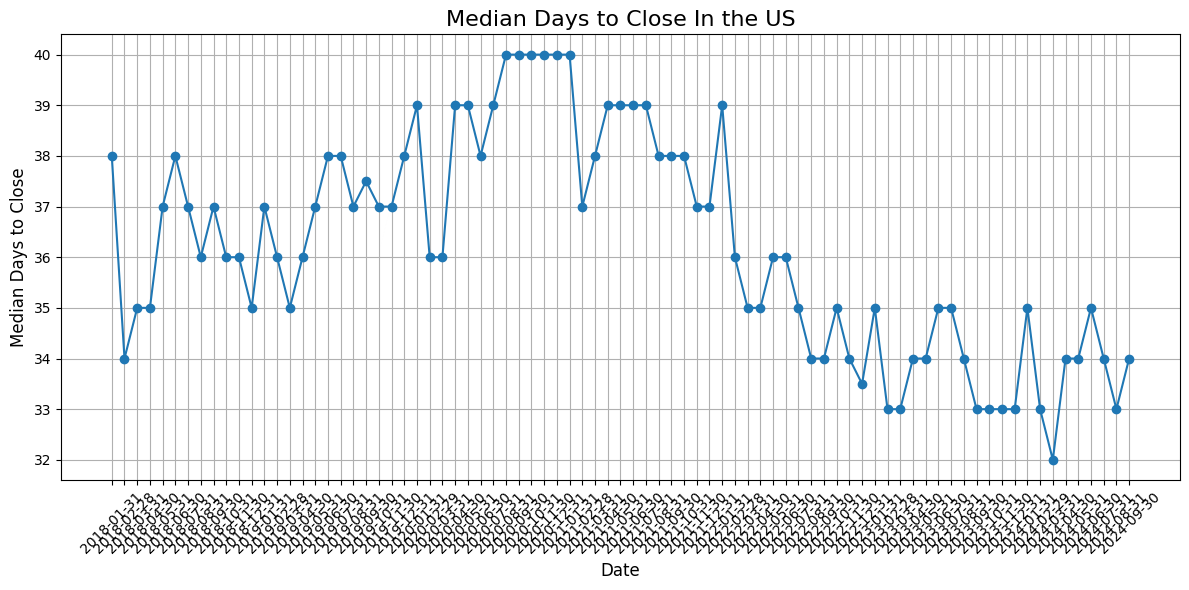

In [20]:
import matplotlib.dates as mdates

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(reduced_median_df['Date'], reduced_median_df['Median_Days_To_Close'], marker='o', linestyle='-')

# Add titles and labels
plt.title('Median Days to Close In the US', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Median Days to Close', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

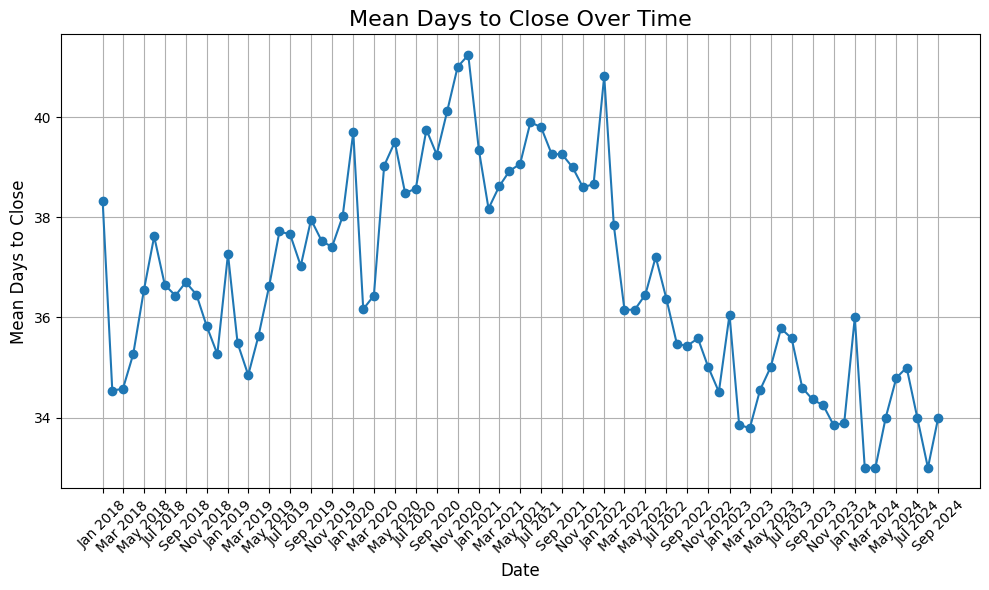

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Date' column is in datetime format
reduced_mean_df['Date'] = pd.to_datetime(reduced_mean_df['Date'], errors='coerce')

# Sort by date (if necessary)
reduced_mean_df = reduced_mean_df.sort_values('Date')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(reduced_mean_df['Date'], reduced_mean_df['Mean_Days_To_Close'], marker='o', linestyle='-')

# Add titles and labels
plt.title("Mean Days to Close Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean Days to Close", fontsize=12)

# Format the X-axis to show every other date
ax = plt.gca()

# Select every other date for tick positions
tick_positions = reduced_mean_df['Date'][::2]  # Every second date
tick_labels = tick_positions.dt.strftime('%b %Y')  # Convert to formatted strings

# Apply the custom ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

# Rotate X-axis labels for readability
plt.xticks(rotation=45)

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


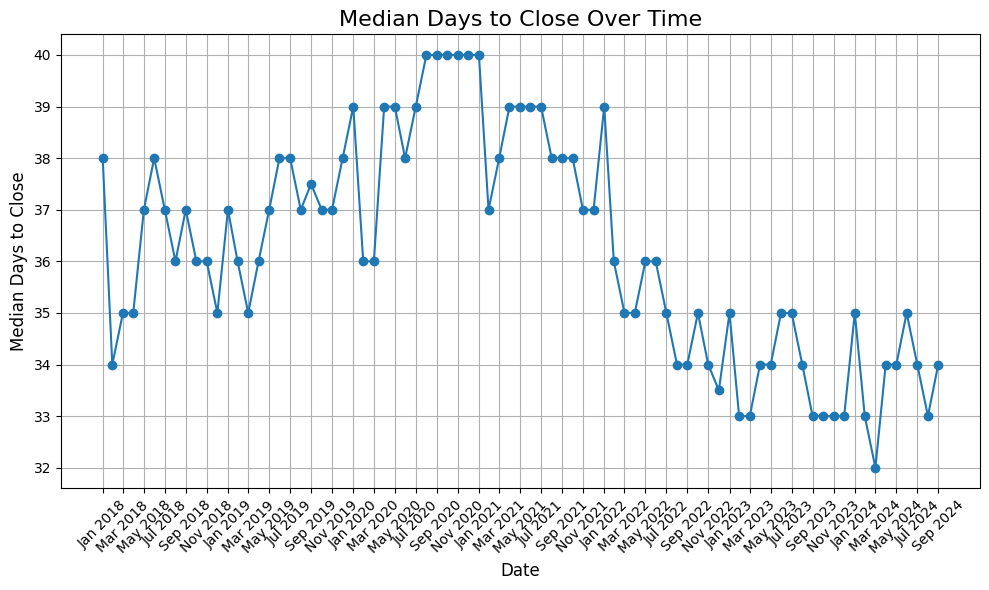

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Date' column is in datetime format
reduced_median_df['Date'] = pd.to_datetime(reduced_median_df['Date'], errors='coerce')

# Sort by date (if necessary)
reduced_median_df = reduced_median_df.sort_values('Date')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(reduced_median_df['Date'], reduced_median_df['Median_Days_To_Close'], marker='o', linestyle='-')

# Add titles and labels
plt.title("Median Days to Close Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Median Days to Close", fontsize=12)

# Format the X-axis to show every other date
ax = plt.gca()

# Select every other date for tick positions
tick_positions = reduced_median_df['Date'][::2]  # Every second date
tick_labels = tick_positions.dt.strftime('%b %Y')  # Convert to formatted strings

# Apply the custom ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

# Rotate X-axis labels for readability
plt.xticks(rotation=45)

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# Plot data per state and region
# States and regions with the lowest days to close is better to invest in

# missing data is good in this case? Only base our findings on the data we have

# steps to clean
# Drop data that has at least 25% mising data?
# Identify and remove outliers
# 1. Fill in data that has data to the left and right with the mean
# 2. Fill in data with the mean of each column of that state